In [26]:
import ROOT

import numpy as np
import pickle
import matplotlib.pyplot as plt
from functions import HistogramFunctions,AuxiliarFunctions,FigureFunctions,FitFunctions,rootnotes


ROOT.gROOT.Reset()
ROOT.gStyle.SetOptStat(0)

print "ok!"

ok!


In [11]:
# load the dictionary with all trained models
where_models = '/home/micael/MyWorkspace/DATA/NN_outputs'
modelos_comPtRel = pickle.load(open(where_models+'/'+'Estimadores_comPTREL.pkl'))
modelos_semPtRel = pickle.load(open(where_models+'/'+'Estimadores_semPTREL.pkl'))

trn_desc_comPtRel = pickle.load(open(where_models+'/'+'Trn_desc_comPTREL.pkl'))
trn_desc_semPtRel = pickle.load(open(where_models+'/'+'Trn_desc_semPTREL.pkl'))

save_figures = '/home/micael/MyWorkspace/DATA/trabalho_CPE721'

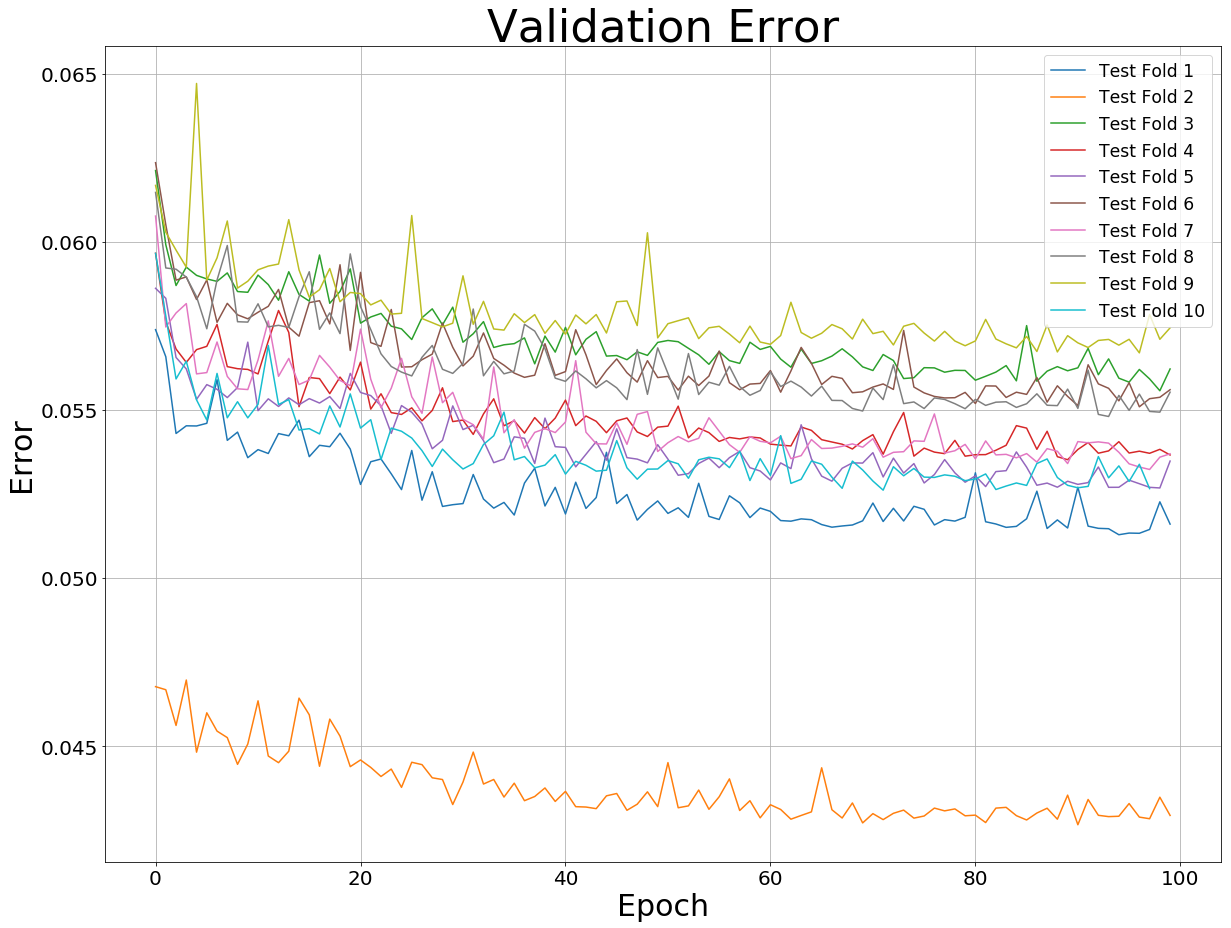

In [25]:
fig, ax = plt.subplots(1,figsize=(20,15))
list_t = []
for i in range(len(trn_desc_comPtRel)):
    plt.plot(trn_desc_comPtRel[i].history['val_loss'])
    list_t.append('Test Fold %.f'%(i+1))
    plt.legend(list_t, loc='best',fontsize = 'xx-large')
plt.title('Validation Error',fontsize=45)
plt.ylabel('Error',fontsize=30)
plt.xlabel('Epoch',fontsize=30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.grid()
plt.savefig(save_figures+'/'+'validation_error_10Folds.png')
plt.savefig(save_figures+'/'+'validation_error_10Folds.pdf')
plt.show()


In [40]:
# Confirm our array shape
path = "/home/micael/MyWorkspace/DATA"
data = np.load(path+"/"+"lvbb125Array.npy")
data_target = data[:,[12]]

print data.shape
data

(191100, 13)


array([[  9.52196307e-03,   6.12077856e-05,   1.65209174e-02, ...,
          9.21870469e+01,   5.98104895e+01,   6.10195977e+01],
       [  1.67018827e-02,   1.13179535e-01,   9.47747454e-02, ...,
          1.07602320e+02,   5.98104895e+01,   6.44654687e+01],
       [  8.95111356e-03,   9.14592529e-05,   8.82276613e-03, ...,
          3.70010500e+02,   4.97765697e+01,   1.06724656e+02],
       ..., 
       [  1.62160210e-02,   5.48769441e-03,   2.28184238e-02, ...,
          3.86259570e+01,   3.57536859e+01,   3.39022539e+01],
       [  1.42509257e-02,   1.21706940e-01,   4.58930284e-02, ...,
          1.07292875e+02,   5.50991584e+01,   9.68779375e+01],
       [  1.58070903e-02,   4.79239076e-02,   1.20003656e-01, ...,
          6.82103906e+01,   5.50991584e+01,   5.35117266e+01]])

In [41]:
from sklearn.model_selection import KFold
from sklearn import preprocessing

n_folds = int(10)
#n_samples =  int(0.1*data_target.shape[0])
n_inits = 5
norm = 'mapstd'

kf = KFold(n_splits=n_folds,shuffle=True)
CVO = list(kf.split(data_target))

# Train information 
#n_folds = 2
#n_inits = 1
#norm = 'mapstd'

train_info = {}
train_info['n_folds'] = n_folds
train_info['n_inits'] = n_inits
train_info['norm'] = norm

trn_desc = {}
estimator = {}

# Isto deve estar dentro do primeiro 'for'. dessa maneira meu conjuto de treino e validação são os mesmo em todos os folds.

MOP_list = []                           
for ifold in range(n_folds):
    train_id, test_id = CVO[ifold]
    
    
    # normalize data based in train set
    if train_info['norm'] == 'mapstd':
        scaler = preprocessing.StandardScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapstd_rob':
        scaler = preprocessing.RobustScaler().fit(data_inputs[train_id,:])
    elif train_info['norm'] == 'mapminmax':
        scaler = preprocessing.MinMaxScaler().fit(data_inputs[train_id,:])
        
    norm_all_data = scaler.transform(data_inputs)
# Normalize the outputs
    [freq, target_values] = np.histogram(data_target[train_id,:],
             bins=np.linspace(data_target[train_id,:].min(),data_target[train_id,:].max(),50))

    MOP = target_values[np.argmax(freq)]
    MOP_list.append(MOP)
    print 'Fold',ifold, 'MOP=', MOP

Fold 0 MOP= 46.6801470424
Fold 1 MOP= 46.6801470424
Fold 2 MOP= 46.6801470424
Fold 3 MOP= 46.6801470424
Fold 4 MOP= 46.6801470424
Fold 5 MOP= 46.6801470424
Fold 6 MOP= 46.6801470424
Fold 7 MOP= 46.6801470424
Fold 8 MOP= 52.6052574936
Fold 9 MOP= 46.7099231306


In [42]:
MOP_list

[46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 46.680147042410724,
 52.605257493622446,
 46.709923130580357]

In [29]:
# Confirm our array shape
root_file_path = "/home/micael/MyWorkspace/DATA"
data_input = root_file_path+"/"+"lvbb125.root"
treeName = "perevent"
file = ROOT.TFile(data_input,"READ")
tree = file.Get(treeName)
nrEvents = tree.GetEntries()
print nrEvents

95550


In [45]:
for i in 

In [ ]:
for j in range(len(modelos_comPtRel)):
    for (i,entry) in enumerate(tree):
        if nrEvents>0:
            if i>nrEvents:
                break
            # ==== Trtuh ======== #  
            j1Truth_LV = ROOT.TLorentzVector()
            j2Truth_LV = ROOT.TLorentzVector()
        
            j1Truth_pt = tree.j1_GENWZ_Pt
            j1Truth_phi = tree.j1_GENWZ_Phi
            j1Truth_eta = tree.j1_GENWZ_Eta
            j1Truth_e = tree.j1_GENWZ_E
            
            j2Truth_pt = tree.j2_GENWZ_Pt
            j2Truth_phi = tree.j2_GENWZ_Phi
            j2Truth_eta = tree.j2_GENWZ_Eta
            j2Truth_e = tree.j2_GENWZ_E
            
            j1Truth_LV.SetPtEtaPhiE(j1Truth_pt,j1Truth_eta,j1Truth_phi,j1Truth_e)
            j2Truth_LV.SetPtEtaPhiE(j2Truth_pt,j2Truth_eta,j2Truth_phi,j2Truth_e)
            
            dijetTruth_LV = j1Truth_LV + j2Truth_LV
            MassTruth = dijetTruth_LV.M()
            
            #====== Reco =========
            j1Reco_LV = ROOT.TLorentzVector()
            j2Reco_LV = ROOT.TLorentzVector()
        
            j1_pt = tree.j1_EMJESGSCMu_Pt
            j1_phi = tree.j1_EMJESGSCMu_Phi
            j1_eta = tree.j1_EMJESGSCMu_Eta
            j1_e = tree.j1_EMJESGSCMu_E
            
            j2_pt = tree.j2_EMJESGSCMu_Pt
            j2_phi = tree.j2_EMJESGSCMu_Phi
            j2_eta = tree.j2_EMJESGSCMu_Eta
            j2_e = tree.j2_EMJESGSCMu_E
            
            j1Reco_LV.SetPtEtaPhiE(j1_pt,j1_eta,j1_phi,j1_e)
            j2Reco_LV.SetPtEtaPhiE(j2_pt,j2_eta,j2_phi,j2_e)
            
            dijetReco_LV = j1Reco_LV + j2Reco_LV
            MassReco = dijetReco_LV.M()
        
            #========= NN =========
            
            j1_LV = ROOT.TLorentzVector()
            j2_LV = ROOT.TLorentzVector()
        
            j1_LVnoPtRel = ROOT.TLorentzVector()
            j2_LVnoPtRel = ROOT.TLorentzVector()
            
            #=============================================================================
            #=======================EMJESGSCMu========================================
            # variables for EMJESGSCMu j1.     
        E1_EMJESGSCMu = tree.j1_EMJESGSCMu_E
        Phi1_EMJESGSCMu = tree.j1_EMJESGSCMu_Phi
        Eta1_EMJESGSCMu = tree.j1_EMJESGSCMu_Eta
        Pt1_EMJESGSCMu = tree.j1_EMJESGSCMu_Pt
    
            # variables for EMJESGSCMu j2.     
        E2_EMJESGSCMu = tree.j2_EMJESGSCMu_E
        Phi2_EMJESGSCMu = tree.j2_EMJESGSCMu_Phi
        Eta2_EMJESGSCMu = tree.j2_EMJESGSCMu_Eta
        Pt2_EMJESGSCMu = tree.j2_EMJESGSCMu_Pt
    
            # PtRel in EMJESGSCMu
        Theta1_EMJESGSCMu = AuxiliarFunctions.theta(Eta1_EMJESGSCMu)
        Comp1_EMJESGSCMu = AuxiliarFunctions.Componets(E1_EMJESGSCMu,Eta1_EMJESGSCMu,Phi1_EMJESGSCMu,Theta1_EMJESGSCMu)
        norm1_EMJESGSCMu = AuxiliarFunctions.norm(Comp1_EMJESGSCMu)

        Theta2_EMJESGSCMu = AuxiliarFunctions.theta(Eta2_EMJESGSCMu)
        Comp2_EMJESGSCMu = AuxiliarFunctions.Componets(E2_EMJESGSCMu,Eta2_EMJESGSCMu,Phi2_EMJESGSCMu,Theta2_EMJESGSCMu)
        norm2_EMJESGCMu = AuxiliarFunctions.norm(Comp2_EMJESGSCMu)
    
            # sum of components.
        Comp3_EMJESGSCMu = AuxiliarFunctions.somaComponents(Comp1_EMJESGSCMu,Comp2_EMJESGSCMu)
        norm3_EMJESGSCMu = AuxiliarFunctions.norm(Comp3_EMJESGSCMu)
        numerador1_EMJESGSCMu = AuxiliarFunctions.numerador(Comp1_EMJESGSCMu,Comp3_EMJESGSCMu)    
        angle1_EMJESGSCMu = AuxiliarFunctions.alpha(numerador1_EMJESGSCMu,norm1_EMJESGSCMu,norm3_EMJESGSCMu)
    
            #compute Relative Pt
        PtRel_j1_EMJESGSCMu = AuxiliarFunctions.PtRelative(E1_EMJESGSCMu,angle1_EMJESGSCMu)
    
        j1_FracEM3 = tree.j1_FracEM3
        j1_FracTile0 = tree.j1_FracTile0
        j1_TrkWidth = tree.j1_TrkWidth
        j1_EMF = tree.j1_EMF
        j1_JVF = tree.j1_JVF
        j1_NTrk = tree.j1_NTrk 
        j1_SumPtTrk = tree.j1_SumPtTrk
            # only for EM and j2.
        j2_FracEM3 = tree.j2_FracEM3
        j2_FracTile0 = tree.j2_FracTile0
        j2_TrkWidth = tree.j2_TrkWidth
        j2_EMF = tree.j2_EMF
        j2_JVF = tree.j2_JVF
        j2_NTrk = tree.j2_NTrk 
        j2_SumPtTrk = tree.j2_SumPtTrk
    
        # Create a numpy array with all data and normalize then
        # ========= with PtRel =================
        j1 = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j1 = np.reshape(j1, (1,12))
        norm_j1_data = scaler.transform(V_j1)
            
        j2 = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu, PtRel_j1_EMJESGSCMu])
        
        V_j2 = np.reshape(j2, (1,12))
        norm_j2_data = scaler.transform(V_j2)
        
        # ========= without PtRel ==============
        
        j1noPtRel = np.array([j1_FracEM3, j1_FracTile0, j1_TrkWidth, j1_EMF, j1_JVF, j1_NTrk,
                              j1_SumPtTrk, Pt1_EMJESGSCMu, Eta1_EMJESGSCMu, Phi1_EMJESGSCMu, 
                              E1_EMJESGSCMu])
        
        V_j1noPtRel = np.reshape(j1noPtRel, (1,11))
        norm_j1noPtRel_data = scaler_noPtRel.transform(V_j1noPtRel)
            
        j2noPtRel = np.array([j2_FracEM3, j2_FracTile0, j2_TrkWidth, j2_EMF, j2_JVF, j2_NTrk,
                             j2_SumPtTrk, Pt2_EMJESGSCMu, Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,
                             E2_EMJESGSCMu])
        
        V_j2noPtRel = np.reshape(j2noPtRel, (1,11))
        norm_j2noPtRel_data = scaler_noPtRel.transform(V_j2noPtRel)
        
        # ========= end ==========
        # ========= Predict in two models =======
        Pt1_cor = model.predict(norm_j1_data, batch_size=8, verbose=0)*MOP
        Pt2_cor = model.predict(norm_j2_data, batch_size=8, verbose=0)*MOP
        
        Pt1noPtRel_cor = modelNOPTREL.predict(norm_j1noPtRel_data, batch_size=8, verbose=0)*MOP
        Pt2noPtRel_cor = modelNOPTREL.predict(norm_j2noPtRel_data, batch_size=8, verbose=0)*MOP
        
        # ========== end ==========
        # ========== Set the LorentzVectors ============
        
        j1_LV.SetPtEtaPhiE((Pt1_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LV.SetPtEtaPhiE((Pt2_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= Withou PtRel =============
        
        j1_LVnoPtRel.SetPtEtaPhiE((Pt1noPtRel_cor/Pt1_EMJESGSCMu)*Pt1_EMJESGSCMu,
                           Eta1_EMJESGSCMu, Phi1_EMJESGSCMu,(Pt1noPtRel_cor/Pt1_EMJESGSCMu)*E1_EMJESGSCMu)
        j2_LVnoPtRel.SetPtEtaPhiE((Pt2noPtRel_cor/Pt2_EMJESGSCMu)*Pt2_EMJESGSCMu,
                           Eta2_EMJESGSCMu, Phi2_EMJESGSCMu,(Pt2noPtRel_cor/Pt2_EMJESGSCMu)*E2_EMJESGSCMu)
        
        # ========= end ===============
        # ========= extract the dijet Mass ==========
        
        dijet_LV = j1_LV + j2_LV
        MassNN = dijet_LV.M()
        
        dijet_LVnoPtRel = j1_LVnoPtRel + j2_LVnoPtRel
        MassNNnoPtRel = dijet_LVnoPtRel.M()
        